# Question 4

We will implement the SVM algorithm with gradient descent to classify two gaussians
in 2D. The dataset is given in $\texttt{HW7Q4.csv}$.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part A

In $\texttt{HW7Q4.csv}$, the first 100 rows are the data for cluster $1$: $
(x_i,y_i) \in \mathbb{R}^{2}\times \mathbb{R}$, $i=1,\dots,100$, with $y_i=1$
always. The next 100 rows are the data for cluster $2$: $(x_i,y_i) \in
\mathbb{R}^{2}\times \mathbb{R}$, $i=101,\dots,200$, with $y_i=-1$ always. Create
and turn in a scatter plot of the feature vectors, i.e., the $x_i$'s, colored by
the label, i.e., $y_i$'s (blue for $1$ and red for $-1$).

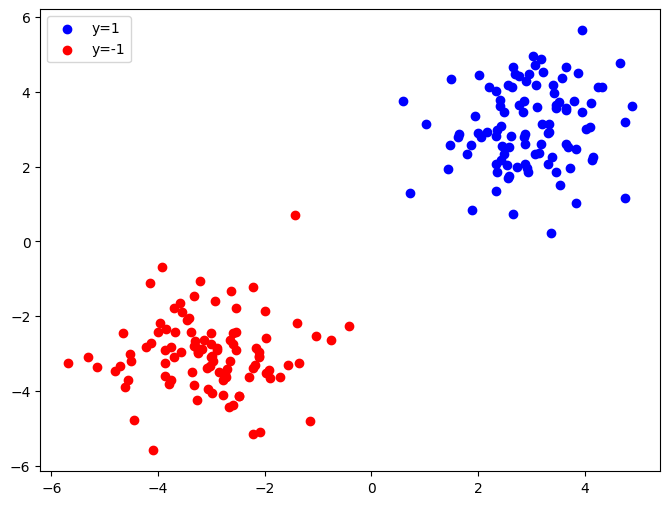

In [34]:
data = pd.read_csv('HW7Q4.csv', header=None)
data.columns = ['x1', 'x2', 'y']

plt.figure(figsize=(8, 6))
plt.scatter(data[:100]['x1'], data[:100]['x2'], color='blue', label='y=1')
plt.scatter(data[100:]['x1'], data[100:]['x2'], color='red', label='y=-1')
plt.legend()
plt.show()

## Part B

Create a function for the gradient of the loss

\begin{aligned}
L(w) &= \frac{1}{2}\|w\|^2 + \sum_{i=1}^n \max(0, 1-y_i\langle x_i, w\rangle) \\
\nabla L(w) &= w + \sum_{i=1}^n -y_i x_i \cdot \mathbb{1}_{1 - y_i\langle x_i, w\rangle > 0},
\end{aligned}
where $\mathbb{1}_{1 - y_i\langle x_i, w\rangle > 0} = \begin{cases}
1 & \text{if } 1 - y_i\langle x_i, w\rangle > 0 \\
0 & \text{else}
\end{cases}$.
Also, here $n=200$. To compute the gradient, you'll have to compute an indicator
of whether $1-y_i\langle x_i, w\rangle$ is positive or negative at every point, and
sum up the contribution of this term for all points where it's positive.

In [43]:
n = len(data)

def indicator(w, x1, x2, y):
    if 1 - y * (w[0] * x1 + w[1] * x2) > 0:
        return 1
    return 0

def L(w):
    return 1/2 * np.linalg.norm(w)**2 + sum([max(0, 1 - row['y'] * (w[0] * row['x1'] + w[1] * row['x2'])) for _, row in data.iterrows()])

def dL(w):
    return w + sum([-row['y'] * np.array([row['x1'], row['x2']]) * indicator(w, row['x1'], row['x2'], row['y']) for _, row in data.iterrows()])

## Part C

Setting the step size $\mu=10^{-4}$ and starting at $w^{(0)} = (-1,1)$, run
1000 iterations of gradient descent. You will create two plots.

i. Plot the classification error (averaged over all the points) as a function of
the iterations. The classification of $x_i$ is determined by $\text{sign}(\langle x_i,w\rangle)$.

ii. Plot the margin $\frac{2}{\|w\|}$ as a function of the iterations. This
shows how much of a gap you have between the classes you've learned.

In [ ]:
T = 1000
mu = 1e-4

def error(w):
    sum = 0
    for _, row in data.iterrows():
        if np.sign(w[0] * row['x1'] + w[1] * row['x2']) != row['y']:
            sum += 1
    return sum / n

w = np.array([-1, 1])
error_val = []
margin_val = []

for t in range(T):
    w = w - mu * dL(w)
    error_val.append(error(w))
    margin_val.append(2 / np.linalg.norm(w))

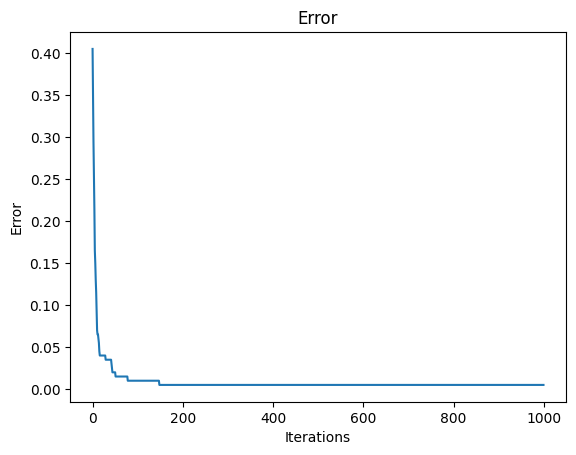

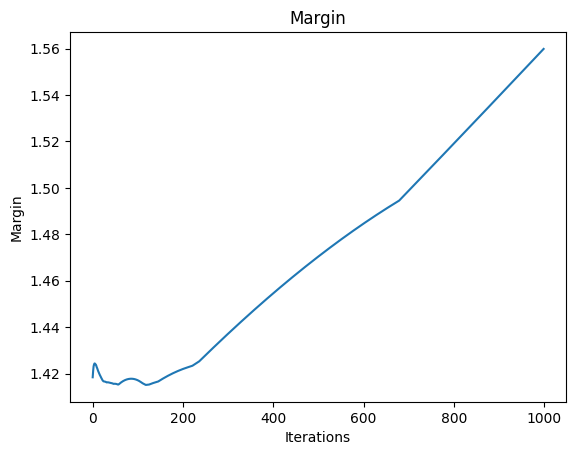

In [ ]:
plt.plot(error_val)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error')

plt.show()

plt.plot(margin_val)
plt.xlabel('Iterations')
plt.ylabel('Margin')
plt.title('Margin')

plt.show()


## Part D

Create another scatter plot of your data, but this time color the points by
the function $f(x_i) = 1-y_i \cdot \langle x_i, w\rangle$. The numbers closest to
0 (positive numbers or largest negative numbers) will show you which points were
"most important" in determining the classification.

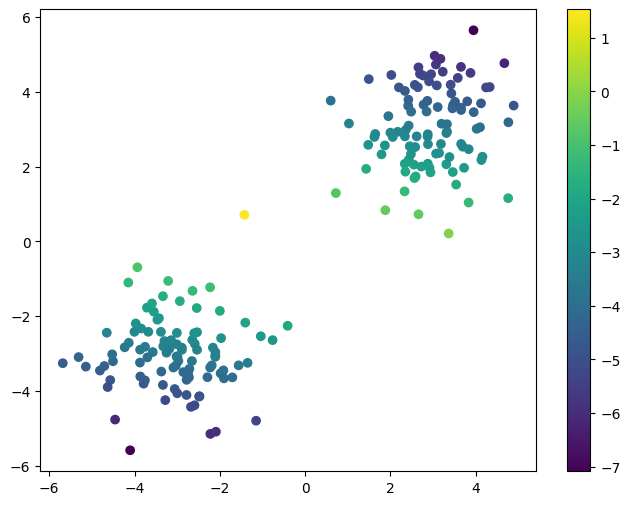

In [54]:
f_values = [1 - row['y'] * (w[0] * row['x1'] + w[1] * row['x2']) for _, row in data.iterrows()]

plt.figure(figsize=(8, 6))
plt.scatter(data['x1'], data['x2'], c=f_values, label='f(x_i)')
plt.colorbar()
plt.show()